In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score
import subprocess
import h2o
h2o.init()
h2o.connect()

In [3]:
df_original = h2o.import_file("/Users/rajat.kabra/Downloads/Mushroom.csv", header=1)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [598]:
df_original.head()

class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
edible,bell,smooth,white,bruises,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
edible,bell,scaly,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,several,grasses
edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [198]:
train_original, test_original= df_original.split_frame(ratios = [.8], seed = 1234)

In [199]:
response_column = "class"
training_columns = ['population','spore-print-color','ring-type','stalk-color-above-ring','stalk-color-below-ring','gill-size','gill-spacing','bruises?']

In [200]:
rf_model_original = H2ORandomForestEstimator(categorical_encoding = "enum", ntrees=1, max_depth=5, nfolds = 20)
rf_model_original.train(x=training_columns, y=response_column, training_frame=train_original)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [201]:
rf_performance_original = rf_model_original.model_performance(test_data=test_original[1:])

In [202]:
rf_predictions_original = rf_model_original.predict(test_original)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [203]:
rf_model_original.model_performance()


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.032929404562661364
RMSE: 0.1814646096699336
LogLoss: 0.09676481175632283
Mean Per-Class Error: 0.04672616421912634
AUC: 0.9912758756205738
Gini: 0.9825517512411477
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6666666567325592: 


,edible,poisonous,Error,Rate
edible,1223.0,28.0,0.0224,(28.0/1251.0)
poisonous,85.0,1111.0,0.0711,(85.0/1196.0)
Total,1308.0,1139.0,0.0462,(113.0/2447.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6666667,0.9516060,1.0
max f2,0.2625250,0.9580263,2.0
max f0point5,1.0,0.9747791,0.0
max accuracy,0.6666667,0.9538210,1.0
max precision,1.0,1.0,0.0
max recall,0.2625250,1.0,2.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.6666667,0.9084879,1.0
max min_per_class_accuracy,0.6666667,0.9289298,1.0
max mean_per_class_accuracy,0.6666667,0.9532738,1.0


Gains/Lift Table: Avg response rate: 48.06 %, avg score: 18.37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1626478,1.0,2.0808565,2.0808565,1.0,1.0,1.0,1.0,0.3384468,0.3384468,108.0856504,108.0856504
,2,0.2239287,0.2625250,0.7144796,1.7069303,0.3433584,0.3435559,0.8203018,0.8203558,0.0437840,0.3822307,-28.5520449,70.6930301
,3,1.0,0.0,0.7960213,1.0,0.3825450,0.0,0.4805713,0.1837012,0.6177693,1.0,-20.3978701,0.0


In [204]:
rf_model_original.model_performance(test_data=test_original)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.030308791704923198
RMSE: 0.17409420353625563
LogLoss: 0.09043256027447023
Mean Per-Class Error: 0.04139143650913302
AUC: 0.9925791693715369
Gini: 0.9851583387430738
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6666666567325592: 


,edible,poisonous,Error,Rate
edible,808.0,18.0,0.0218,(18.0/826.0)
poisonous,48.0,739.0,0.061,(48.0/787.0)
Total,856.0,757.0,0.0409,(66.0/1613.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6666667,0.9572539,1.0
max f2,0.2625250,0.9590544,2.0
max f0point5,1.0,0.9754396,0.0
max accuracy,0.6666667,0.9590825,1.0
max precision,1.0,1.0,0.0
max recall,0.2625250,1.0,2.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.6666667,0.9186810,1.0
max min_per_class_accuracy,0.6666667,0.9390089,1.0
max mean_per_class_accuracy,0.6666667,0.9586086,1.0


Gains/Lift Table: Avg response rate: 48.79 %, avg score: 48.96 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.4333540,1.0,2.0495553,2.0495553,1.0,1.0,1.0,1.0,0.8881830,0.8881830,104.9555273,104.9555273
,2,0.5920645,0.2625250,0.7045346,1.6890052,0.34375,0.3540884,0.8240838,0.8268551,0.1118170,1.0,-29.5465375,68.9005236
,3,1.0,0.0,0.0,1.0,0.0,0.0,0.4879107,0.4895515,0.0,1.0,-100.0,0.0


In [205]:
rf_model_original.download_mojo("/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_mojo.zip")

'/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_mojo.zip'

In [206]:
h2o_jar_path = "/Users/rajat.kabra/Downloads/h2o-3.20.0.5/h2o.jar"
mojo_full_path = "/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_mojo.zip"
gv_file_path = "/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_graph.gv"
image_file_name = "/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_tree"
def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [207]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [208]:
import subprocess
from IPython.display import Image
generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 0)

Success: Graphviz file /Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_graph.gv is generated.


In [209]:
generateTreeImage(gv_file_path, image_file_name, 0)

Success: Image File /Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_tree_0.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_tree_0.png')


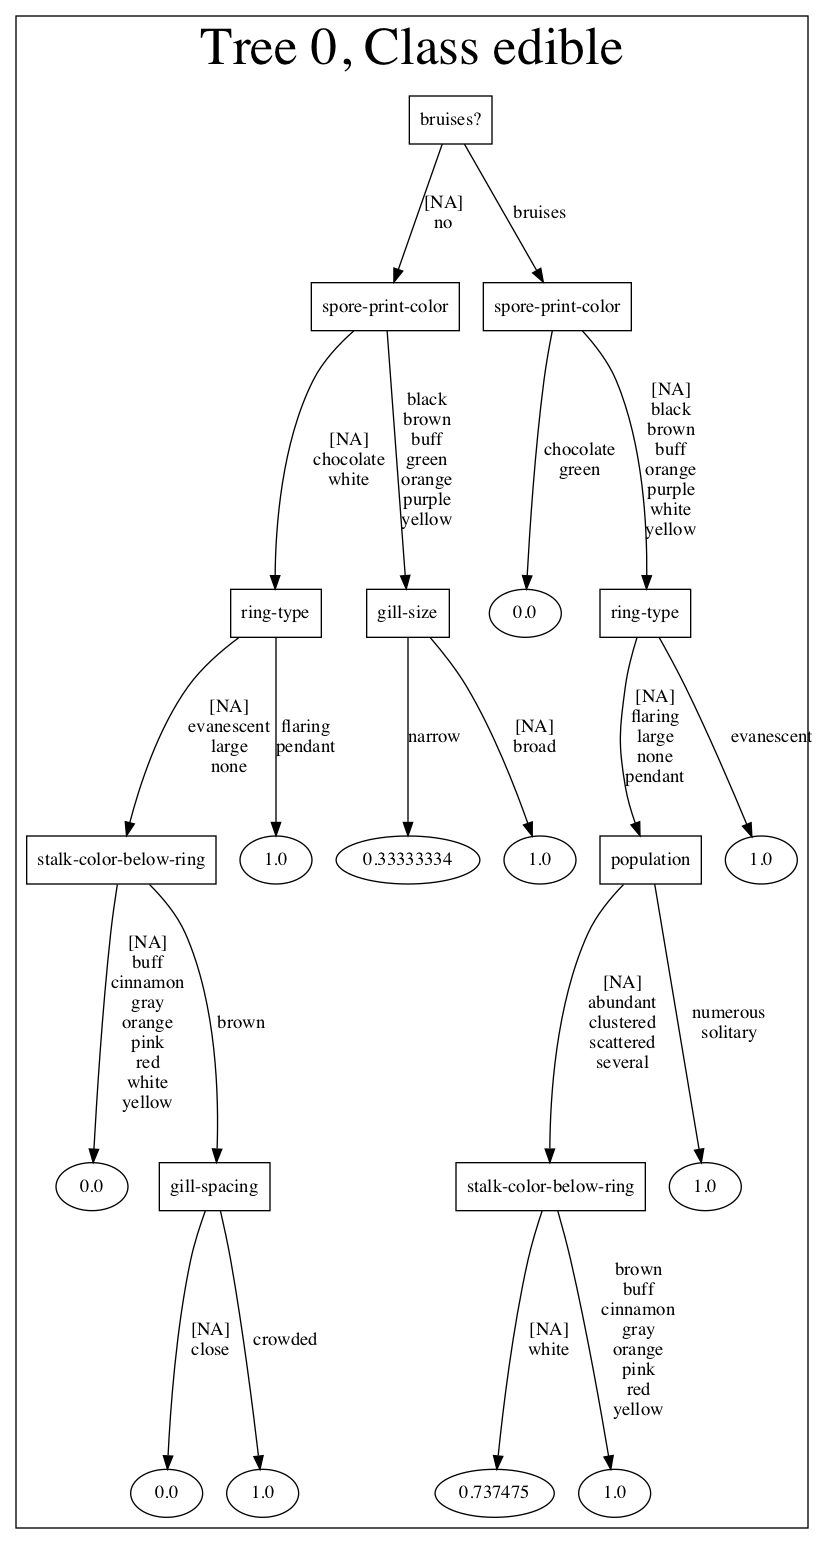

In [210]:
Image(filename='/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_tree_0.png')

In [613]:
# testRecord = 115
# testRecord = 1
# testRecord = 245 #probability
testRecord = 748 #decision

t = test_original[testRecord,:]
path = rf_model_original.predict_leaf_node_assignment(t[1:])

In [614]:
t

class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
poisonous,convex,fibrous,gray,no,foul,free,close,broad,chocolate,enlarging,bulbous,silky,silky,buff,pink,partial,white,one,large,chocolate,solitary,woods


In [615]:
rf_predictions_original[testRecord,:]

predict,edible,poisonous
poisonous,0,1


In [616]:
dic = {}
edges_left = {}
edges_right = {}

In [617]:
import re
with open("/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_graph.gv", 'r') as fin:
    line = fin.readline()
    while line:
        if "\"SG_0_Node_" in line and "label=\"" in line and "\\n" not in line:
            key = line.split("SG_0_Node_",4)[1][:2]
            n = re.findall(r'\d+', key)
            dic[n[0]] = line.split("label=\"",4)[1][:-2]
        line = fin.readline()
    
    

In [618]:
i = 1
with open("/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_graph.gv", 'r') as fin:
    line = fin.readline()
    while line:
        if "->" in line:
            key = line.split("SG_0_Node_",1)[1][:20]
            n = re.findall(r'\d+', key)
            if i%2 ==0:
                edges_right[n[0]] = n[2]
            else:
                edges_left[n[0]] = n[2]
        i = i+1
        line = fin.readline()
    

In [619]:
path = path.as_data_frame()

In [620]:
despath = []
des = ""

In [621]:
t1 = t.as_data_frame()
des = "Check " +str(dic['0'])[:-1] + " -> Ans. " +t1[str(dic[str(0)])[:-1]][0]+""
# despath.append()

In [622]:
s = path['T1.C1'].iloc[0]


In [623]:
node = 0
try:
    for c in s:
        if c == 'L':
            des = des+ " (go left)"
        else:
            des=des+" (go right)"
        if des != "":
            despath.append(des)
        des = ""
        if c == 'L':
            node = edges_left[str(node)]
            default = "Check "
            des= des+str(dic[str(node)])[:-1]
            if (dic[str(node)][:-1] != '1.0'and dic[str(node)][:-1] != '0.0' and not dic[str(node)][:-1].isdecimal() ):
                des = default +des+  " ->  Ans. "+ t1[str(dic[str(node)])[:-1]][0] +""
        else:
            node = edges_right[str(node)]
            default = "Check "
            des = des+str(dic[str(node)])[:-1]
            if (dic[str(node)][:-1] != '1.0' and dic[str(node)][:-1] != '0.0'and not dic[str(node)][:-1].isdecimal()):
                des = default +des+  " -> Ans. "+ t1[str(dic[str(node)])[:-1]][0] +""
                
    print("A decision is made")
    despath.append("                                     ")
    despath.append("Probabiliy of being edible is "+des)
except:
    print("Probability Decision")
    despath.append("                                      ")
    despath.append("Probabiliy of being edible is "+des)

A decision is made


In [624]:
despath

['Check bruises? -> Ans. no (go left)',
 'Check spore-print-color ->  Ans. chocolate (go left)',
 'Check ring-type ->  Ans. large (go left)',
 'Check stalk-color-below-ring ->  Ans. pink (go left)',
 '                                     ',
 'Probabiliy of being edible is 0.0']

In [625]:
t

class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
poisonous,convex,fibrous,gray,no,foul,free,close,broad,chocolate,enlarging,bulbous,silky,silky,buff,pink,partial,white,one,large,chocolate,solitary,woods


In [ ]:
Image(filename='/Users/rajat.kabra/Desktop/decision tree Demo/my_rf_original_tree_0.png')